In [26]:
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import seaborn as sns
#plt.rcParams["font.family"] = 'nanummyeongjo'
dbname="paxstock.db"
fontprop = fm.FontProperties(fname="malgun.ttf", size=12)

In [27]:
def seldb():
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        sql="""
        select 
        IDX,EPRICE,SPRICE,HPRICE,LPRICE,UDOWN,UDRATE,QUANTITY
        from kospi 
        order by IDX
        """
        data=cur.execute(sql).fetchall()
        xdata=[]
        Ey=[]
        Sy=[]
        Hy=[]
        Ly=[]
        #UDCODE,UDOWN,
        URy=[]
        QTy=[]
        i=0
        for d in data:
            xdata.append(i)
            Ey.append(d[1])
            Sy.append(d[2])
            Hy.append(d[3])
            Ly.append(d[4])
            URy.append(d[6])
            QTy.append(d[7])
            i+=1
            #print(d,end="\n")
        conn.commit()
        cur.close()
        print('total',i)
        return (xdata,Ey,Sy,Hy,Ly,URy,QTy)

In [28]:
def baseline(data,seed,day):
    if (seed-day)<0:
        st=0
    else:
        st=seed-day
    da=data[st:seed]
    res=np.average(da)
    #print(res)
    return res

In [39]:
def checkcross(mdata,tgt):
    lm=len(mdata)
    presign=1
    result=[]
    x=[]
    y=[]
    for i in range(lm-1):
        #print('mdata',mdata[i+1])
        if(i>0):
            presign=mdata[i-1]/abs(mdata[i-1])
        else:
            presign=1
            #print("presign:",presign)
        
        if(i<lm):
            nextsign=mdata[i+1]/abs(mdata[i+1])
        else:
            nextsign=1
            #print("nextsign:",nextsign) 
        
        crossresult=presign-nextsign
        #print('c result:',crossresult)
        if(crossresult==2):
            #그래프용
            x.append(i)
            y.append(tgt[i])
            result.append((i,-1))
        elif(crossresult==-2):
            #그래프용            
            x.append(i)
            y.append(tgt[i])
            result.append((i,1))
            #print('not 0')
    return (result,x,y)

 
        
    

In [40]:
def movinga(data,day):
    res=[]
    i=0
    for d in data:
        i+=1
        res.append(baseline(data,i,day))
    res=np.array(res)
    return res

In [41]:
def perform(ey,cp):
    myprop=0
    mypos=1
    for p in cp:
        x=p[0]
        pos=p[1]
        if pos==mypos:
            myprop+=ey[x]*pos*-1
            if pos==1:
                print('time:',x,'매수 :',ey[x],'재산 :',myprop)
                mypos=-1
            else:
                print('time:',x,'매도 :',ey[x],'재산 :',myprop)
                mypos=1
    print("*"*50)
    print("잔액:",myprop)
            
        

In [42]:
def showit():
    data=seldb()
    data=np.array(data).astype(np.int32)
    
    #print("dtype",data.dtype)
    no=240
    x=data[0][:no]
    Ey=data[1][:no]
    Sy=data[2][:no]
    Hy=data[3][:no]
    Ly=data[4][:no]
    URy=data[5][:no]
    QTy=data[6][:no]
    Zeros=np.zeros(no)
    
    My10=movinga(Ey,5)
    My20=movinga(Ey,10)
    Mcross=My10-My20
    Mcross=Mcross.astype(np.int32)
    Cpoint=checkcross(Mcross,My10)
    cpx=Cpoint[1]
    cpy=Cpoint[2]
  
    print(Cpoint)
    
    plt.title('이동 평균선' , fontproperties=fontprop)  
    plt.plot(x,Ey,'y--', label="End")
    plt.plot(x,My10,'r', label="M5")
    plt.plot(x,My20,'b', label="M10")
    plt.plot(cpx,cpy,'go', label="Cross")
    #plt.plot(x,Sy,'g+', label="Start")
   #plt.plot(x,Hy,'r+', label="High")
    #plt.plot(x,Ly,'b+', label="Low")
    plt.legend()
    plt.show()
    perform(Ey,Cpoint[0])
#################################    
    plt.title('크로스 그래프' , fontproperties=fontprop)
    plt.plot(x,Mcross,'g', label="Mcross")
    plt.plot(x,Zeros,'r', label="Zero")
    plt.legend()
    plt.show()
    print(len(data))
    

total 1470
presign: 1
([(17, -1), (22, 1), (23, 1), (26, -1), (27, -1), (32, 1), (51, -1), (58, 1), (69, -1), (85, 1), (96, -1), (97, -1), (108, 1), (109, 1), (115, -1), (130, -1), (131, -1), (140, 1), (158, -1), (169, 1), (190, 1), (193, -1), (202, 1), (203, 1), (211, -1), (223, 1), (225, -1), (233, 1), (234, 1)], [17, 22, 23, 26, 27, 32, 51, 58, 69, 85, 96, 97, 108, 109, 115, 130, 131, 140, 158, 169, 190, 193, 202, 203, 211, 223, 225, 233, 234], [1908.6, 1896.6, 1904.0, 1902.8, 1888.0, 1886.6, 2003.8, 2003.4, 2043.8, 1995.2, 2022.8, 2010.6, 1971.6, 1978.6, 1985.0, 1954.6, 1946.0, 1915.0, 1967.6, 1935.0, 1998.2, 1994.4, 1958.2, 1972.4, 2012.2, 2003.2, 2001.8, 1986.4, 1992.0])


D:\anaconda\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in long_scalars
  app.launch_new_instance()
D:\anaconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.


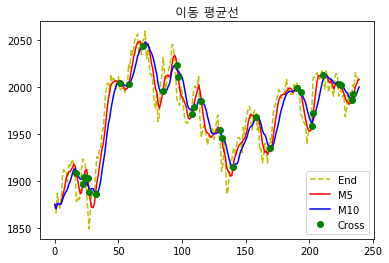

time: 22 매수 : 1923 재산 : -1923
time: 26 매도 : 1867 재산 : -56
time: 32 매수 : 1907 재산 : -1963
time: 51 매도 : 1996 재산 : 33
time: 58 매수 : 2024 재산 : -1991
time: 69 매도 : 2048 재산 : 57
time: 85 매수 : 2031 재산 : -1974
time: 96 매도 : 1986 재산 : 12
time: 108 매수 : 1983 재산 : -1971
time: 115 매도 : 1946 재산 : -25
time: 140 매수 : 1932 재산 : -1957
time: 158 매도 : 1974 재산 : 17
time: 169 매수 : 1945 재산 : -1928
time: 193 매도 : 1971 재산 : 43
time: 202 매수 : 1982 재산 : -1939
time: 211 매도 : 2010 재산 : 71
time: 223 매수 : 1990 재산 : -1919
time: 225 매도 : 2001 재산 : 82
time: 233 매수 : 1988 재산 : -1906
**************************************************
잔액: -1906


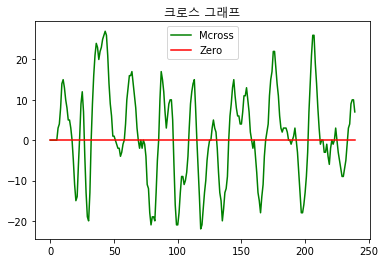

7


In [43]:
showit()